# Libraries Include

In [0]:
import pandas as pd
import numpy as np # linear algebra
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


# Read CSV File

In [0]:
train_df = pd.read_csv('/content/drive/My Drive/musk_csv.csv')

In [3]:
train_df

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,...,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,...,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,...,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-76,52,-41,-34,-32,-66,115,-8,-236,-60,-4,52,104,137,168,-60,-135,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6593,6594,NON-MUSK-jp13,jp13_2+5,51,-123,-23,-108,-117,134,-160,82,-230,-28,-150,-63,-55,-77,-108,-308,-221,-41,-57,12,-112,-183,-198,-35,137,-198,-168,-153,-51,252,-108,135,-121,119,-120,73,28,...,224,-18,-96,43,1,-76,-53,-38,-23,-176,-32,-205,-95,-124,-139,-153,-170,-178,-102,-113,-42,-67,-141,-96,-112,-113,-47,124,-12,62,-66,164,-14,-29,107,171,-44,-115,118,0
6594,6595,NON-MUSK-jp13,jp13_2+6,44,-104,-19,-105,-117,142,-165,68,-225,-32,-124,-77,-43,-74,-100,-291,-215,-25,-49,6,-121,-183,-201,-54,127,-204,-164,-160,-41,255,-117,-104,-14,133,-157,141,46,...,232,-6,-146,-88,-75,-74,-55,-30,-28,-175,-48,-202,-86,-125,-138,-154,-169,-178,-102,-123,-32,-52,-136,-98,-109,-112,-56,-49,-85,60,-51,166,-9,150,129,158,-66,-144,-5,0
6595,6596,NON-MUSK-jp13,jp13_2+7,44,-102,-19,-104,-117,72,-165,65,-219,-12,-107,-66,-58,-82,-77,-288,-214,-21,-58,-32,-93,-183,-197,-71,218,-217,-164,-161,-59,243,-117,-103,-14,118,-157,140,-150,...,167,-13,-188,-89,-117,-57,-47,-33,-28,-175,-50,-216,-129,-130,-138,-155,-169,-178,-102,-124,-32,-51,-136,-98,-123,-112,-55,-47,-84,-226,90,117,-8,150,130,159,-66,-144,-6,0
6596,6597,NON-MUSK-jp13,jp13_2+8,51,-121,-23,-106,-117,63,-161,79,-224,-30,-129,-54,-60,-86,-88,-307,-221,-39,-58,-12,-86,-184,-180,-61,221,-211,-168,-154,-63,243,-107,136,-121,116,-122,73,-155,...,167,7,-170,43,-6,-61,-47,-43,-23,-176,-33,-212,-131,-113,-139,-153,-170,-178,-103,-114,-42,-66,-141,-96,-123,-113,-46,124,-11,-238,86,99,-14,-31,106,171,-44,-116,117,0


# Split up the dataset into inputs and targets

# Remove the columns molecule_name, class, conformation_name as we will attempt to predict the class and ID column is not needed so remove that. 

In [4]:
train_X = train_df.drop(columns=['molecule_name','class','conformation_name','ID'])
train_X.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,...,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166
0,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,40,-27,68,...,-27,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96
1,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,2,-144,38,...,17,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79
2,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,3,-129,37,...,41,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39
3,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,3,-144,38,...,17,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80
4,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,3,-144,38,...,17,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-76,52,-41,-34,-32,-66,115,-8,-236,-60,-4,52,104,137,168,-60,-135,80


In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

Using TensorFlow backend.


# Class will be our target

In [6]:
train_y = train_df[['class']]
#train_y = to_categorical(train_y,num_classes=2)
train_y[0:5]

,class
0,1
1,1
2,1
3,1
4,1


# Preprocess the data. Normalize the columns in the training set.

In [0]:
x_mean = np.mean(train_X, axis = 0)
x_std = np.std(train_X, axis = 0)
x_train = (train_X - x_mean) / x_std

# Split the data into a training and validation set with ratio 80:20

In [0]:
x_train, x_validation, y_train, y_validation = train_test_split(x_train, train_y, test_size = 0.2)

# Now we are ready to train our neural network. First we start by importing the Keras library.

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

# Construct the Sequential model

## I chose to construct my own sequential model because it has very less parameters as compared to existing pre-trained models. Also the accuarcy is good.

In [10]:
model = Sequential()
model.add(Dense(128, activation="relu", input_shape = (x_train.shape[1],))) # Hidden Layer 1 that receives the Input from the Input Layer

model.add(Dense(64, activation="relu")) # Hidden Layer 2
model.add(Dropout(0.2))

model.add(Dense(32, activation="relu")) # Hidden Layer 3
model.add(Dropout(0.2))

model.add(Dense(16, activation="relu")) # Hidden Layer 4
model.add(Dropout(0.2))


model.add(Dense(1, activation="sigmoid")) # Outout Layer

model.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               21376     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_

# Compile the model. You need to provide:
- Optimizer (to update the network)
- Loss function (that you want to minimize)
- Metric (For the user to know how the model is performing)

In [11]:
model.compile(optimizer='adam', loss = "binary_crossentropy", metrics = ['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


# Fit the model:
- Provide batch size (how many training examples to use at a single time).
- Provide epoch number (how many iterations to perform for each batch)

In [12]:
hist=model.fit(x_train, y_train,validation_split=0.2, batch_size = 64, epochs = 20)




Train on 4222 samples, validate on 1056 samples
Epoch 1/20





4222/4222 [==============================] - 10s 2ms/step - loss: 0.3746 - acc: 0.8314 - val_loss: 0.2008 - val_acc: 0.9205
Epoch 2/20
4222/4222 [==============================] - 0s 85us/step - loss: 0.1914 - acc: 0.9280 - val_loss: 0.1232 - val_acc: 0.9536
Epoch 3/20
4222/4222 [==============================] - 0s 90us/step - loss: 0.1277 - acc: 0.9526 - val_loss: 0.0918 - val_acc: 0.9621
Epoch 4/20
4222/4222 [==============================] - 0s 98us/step - loss: 0.0964 - acc: 0.9678 - val_loss: 0.0802 - val_acc: 0.9631
Epoch 5/20
4222/4222 [==============================] - 0s 80us/step - loss: 0.0751 - acc: 0.9721 - val_loss: 0.0642 - val_acc: 0.9792
Epoch 6/20
4222/4222 [==============================] - 0s 96us/step - loss: 0.0631 - acc: 0.9775 - val_loss: 0.0582 - val_acc: 0.9801
Epoch 7/20
4222/4222 [==============================] - 0s 100us/step - loss: 0.0516 - acc: 0.9796 - val_loss: 0.0563 - val_acc: 0.981

# Save the weights of model

In [0]:
model.save_weights("model.h5")

# See validation loss and accuracy

In [13]:
validation_loss, validation_accuracy = model.evaluate(x_validation, y_validation, batch_size=32)
print("Loss: "+ str(np.round(validation_loss, 3)))
print("Accuracy: "+ str(np.round(validation_accuracy, 3)))

1320/1320 [==============================] - 0s 53us/step
Loss: 0.031
Accuracy: 0.992


In [0]:
val_loss_ = hist.history['val_loss']
train_loss_ = hist.history['loss']
val_acc_ = hist.history['val_acc']
train_acc_ = hist.history['acc']

# Plot the loss and accuracy graph

In [0]:
def plot_loss_accuracy(hist):
  # plot loss
  print("training_loss =", hist.history['loss'][-1],  "   val_loss =", hist.history['val_loss'][-1])
  print("training_acc =", hist.history['acc'][-1]*100, "   val_acc =", hist.history['val_acc'][-1]*100)
  plt.plot(hist.history['val_loss'], label='val_loss')
  plt.plot(hist.history['loss'], label='training_loss')

  # plot accuracy
  plt.plot(hist.history['val_acc'], label='val_acc')
  plt.plot(hist.history['acc'], label='training_acc')
  plt.legend()
  plt.show()

training_loss = 0.0048763112597992936    val_loss = 0.02972636541821747
training_acc = 99.85788725722406    val_acc = 99.24242424242425


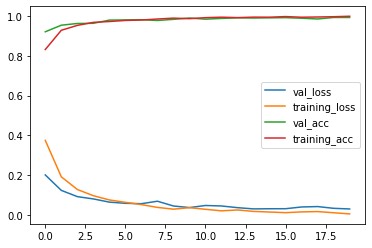

In [16]:
plot_loss_accuracy(hist)

In [0]:
y_pred = model.predict_classes(x_validation, verbose=0)

In [0]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Precision

In [19]:
precision = precision_score(y_validation,y_pred)
print('Precision: %.3f' % precision)

Precision: 0.977


# Recall

In [20]:
recall = recall_score(y_validation,y_pred)
print('Recall: %.3f' % recall)

Recall: 0.972


# F1 Score

In [21]:
f1 = f1_score(y_validation,y_pred)
print('F1 score: %.3f' % f1)

F1 score: 0.974
